In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = 'C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\DATASET\\TRAIN'
val_dir = 'C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\DATASET\\TEST'

In [3]:
print(data_dir)

C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\DATASET\TRAIN


C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\DATASET\TRAIN\O\O_10.jpg


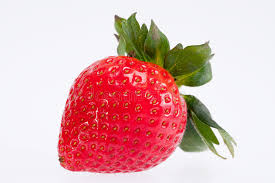

In [4]:
categories = ['O', 'R']
path = os.path.join(data_dir, categories[0])
img = os.path.join(path, os.listdir(path)[0])
print(img)
PIL.Image.open(img)

In [31]:
img_height, img_width = 250, 250
batch_size = 32



In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = 123,
    label_mode='binary',
    image_size= (img_height, img_width),
    batch_size = batch_size
)

Found 19998 files belonging to 2 classes.


In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed = 123,
    label_mode='binary',
    image_size= (img_height, img_width),
    batch_size = batch_size
)

Found 2224 files belonging to 2 classes.


In [34]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


In [42]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                  input_shape = (img_height, img_width, 3),
                                                  pooling = 'avg', classes = 2,
                                                  weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation="relu"))
resnet_model.add(Dense(1, activation = 'sigmoid'))

resnet_model.build((None, img_height, img_width, 3))

In [43]:
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [45]:
resnet_model.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
epochs = 10

history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1650s 3s/step - accuracy: 0.9016 - loss: 0.2697 - val_accuracy: 0.9245 - val_loss: 0.2172
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1658s 3s/step - accuracy: 0.9554 - loss: 0.1190 - val_accuracy: 0.9141 - val_loss: 0.2650
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1664s 3s/step - accuracy: 0.9692 - loss: 0.0849 - val_accuracy: 0.9119 - val_loss: 0.3320
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1520s 2s/step - accuracy: 0.9742 - loss: 0.0697 - val_accuracy: 0.9092 - val_loss: 0.3444
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1450s 2s/step - accuracy: 0.9789 - loss: 0.0516 - val_accuracy: 0.8705 - val_loss: 0.6255
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1483s 2s/step - accuracy: 0.9830 - loss: 0.0459 - val_accuracy: 0.8772 - val_loss: 0.4899
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1406s 2s/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9128 - val_loss: 0.4355
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1381s 2s/step - accuracy: 0.9935 - loss: 0.0179 - 

In [49]:
resnet_model.save('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\modelV2.keras')

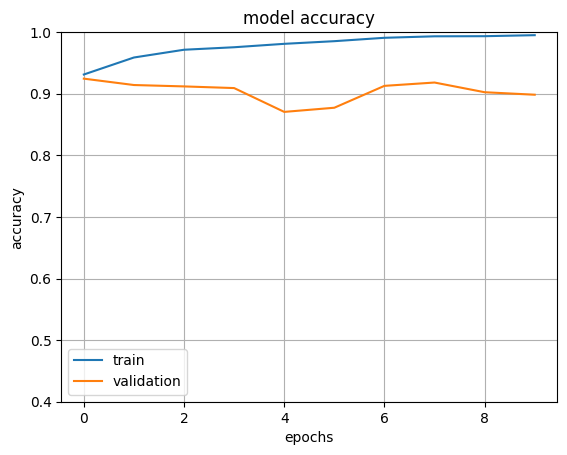

In [50]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin = 0.4, ymax = 1)
plt.grid()
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.show()

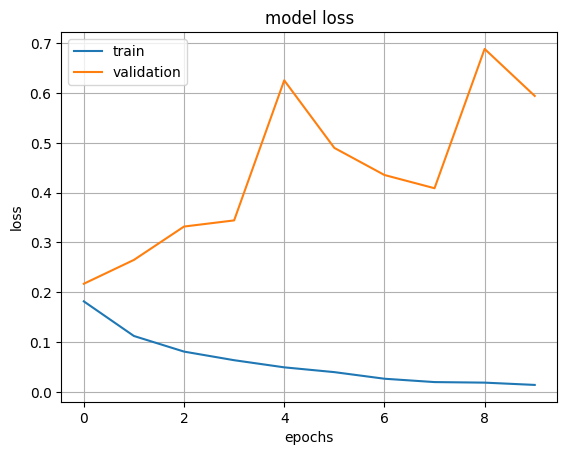

In [51]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.show()

C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\DATASET\TEST\O\O_13280.jpg
(1, 250, 250, 3)


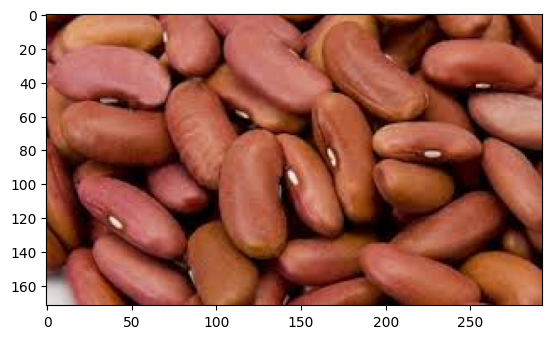

In [105]:
import cv2

path = os.path.join(val_dir, categories[0])
img = os.path.join(path, os.listdir(path)[560])
#img = 'C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\test.jpg'
print(img)
#PIL.Image.open(img)

image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)

In [106]:
pred = resnet_model.predict(image)
print(pred[0][0])
index = round(pred[0][0])
print(categories[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1.4711538e-16
O


In [79]:
loaded = tf.keras.models.load_model('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\modelV2.keras')

In [107]:
import cv2

path = os.path.join(val_dir, categories[0])
img = os.path.join(path, os.listdir(path)[560])
#img = 'C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\test.jpg'
#PIL.Image.open(img)

image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis = 0)

pred = loaded.predict(image)
print(pred[0][0])
index = round(pred[0][0])
print(categories[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1.4711538e-16
O


In [124]:
# Convert the model

#resnet_model.save('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\testV2.h5')

#loaded.export(filepath="hopefulModel")


converter = tf.lite.TFLiteConverter.from_saved_model('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\hopefulModel') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

'''

OSError: SavedModel file does not exist at: C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\hopefulModel\saved_model.pb\{saved_model.pbtxt|saved_model.pb}

In [13]:
new_load = tf.keras.models.load_model('modelV2.keras', compile = False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1.6625039e-07
O


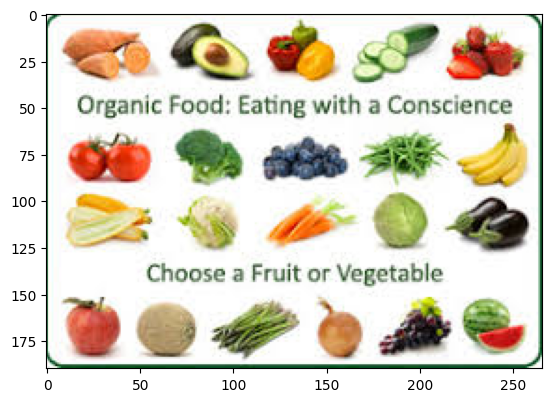

In [14]:
import cv2

path = os.path.join(data_dir, categories[0])
img = os.path.join(path, os.listdir(path)[1200])
#img = 'C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\test.jpg'
#PIL.Image.open(img)

image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image, (250, 250))

plt.imshow(image)
image = np.expand_dims(image_resized, axis = 0)

pred = new_load.predict(image)
print(pred[0][0])
index = round(pred[0][0])
print(categories[index])

In [145]:
new_load.export('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\try14th')

INFO:tensorflow:Assets written to: C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\try14th\assets


INFO:tensorflow:Assets written to: C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\try14th\assets


Saved artifact at 'C:\Users\hshah\Desktop\important vivi\coding\Python\TrashDetection\try14th'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2578879673744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879675856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879674512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879673936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879674704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879665872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879672784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879672208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879673168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578879672400: TensorSpec(shape=(), dtype=t

In [150]:
tf.saved_model.save(new_load, 'tmp/Garbage/')

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [147]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\try14th') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model14th.tflite', 'wb') as f:
  f.write(tflite_model)

In [3]:
converter = tf.lite.TFLiteConverter.from_saved_model('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\try14th')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open('model_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

In [21]:
#TRY TO MAKE QUANTIZED MODEL

In [5]:
converter = tf.lite.TFLiteConverter.from_saved_model('C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\try14th')
tflite_model = converter.convert()


In [6]:
import pathlib

tflite_models_dir = pathlib.Path("C:/Users/hshah/Desktop/important vivi/coding/Python/TrashDetection/tmp/garbage_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [7]:
tflite_model_file = tflite_models_dir/"garbage_model.tflite"
tflite_model_file.write_bytes(tflite_model)

98163212

In [8]:
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"garbage_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

24972752

In [12]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_file))
interpreter.allocate_tensors()
     


In [ ]:
#SEEMS TO BE WORKING GREAT FROM HERE.... QUANT FILE SIZE IS 

In [3]:
tflite_model_quant_file = "C:\\Users\\hshah\\Desktop\\important vivi\\coding\\Python\\TrashDetection\\tmp\\garbage_models\\garbage_model_quant.tflite"
interpreter_quant = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter_quant.allocate_tensors()

In [5]:
import cv2

input_details = interpreter_quant.get_input_details()
output_details = interpreter_quant.get_output_details()

# Print output details for debugging
print("Output details:", output_details)

img = cv2.imread("DATASET/TRAIN/O/O_2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (input_details[0]['shape'][1], input_details[0]['shape'][2]))
test_image = np.expand_dims(img, axis=0).astype(np.float32)

input_index = input_details[0]["index"]
interpreter_quant.set_tensor(input_index, test_image)

interpreter_quant.invoke()

output_index = output_details[0]["index"]
predictions = interpreter_quant.get_tensor(output_index)


print("Raw predictions:", predictions[0][0])



Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 191, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Raw predictions: 1.445761e-10


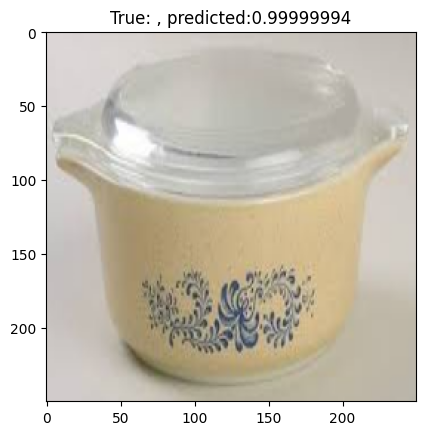

In [5]:
import matplotlib.pylab as plt

plt.imshow(img)
template = "True: {true}, predicted:{predict}"
_  = plt.title(template.format(true="", predict=str(predictions[0][0])))
plt.grid(False)